スパースモデリング第14章　画像のノイズ除去
==
NL-means, BM3D

In [3]:
from matplotlib.font_manager import FontProperties
from skimage.io import imread
from skimage.restoration import denoise_nl_means
from pybm3d.bm3d import bm3d

font_path = u'/Library/Fonts/ヒラギノ角ゴ Pro W3.otf'
font_prop = FontProperties(fname=font_path)
plt.rc('font',family=font_prop.get_name())

def get_psnr(im, recon):
    """ PSNRを得る """ 
    return 10. * np.log(im.max() / np.sqrt(np.mean((im - recon) ** 2)))

Barbara
--

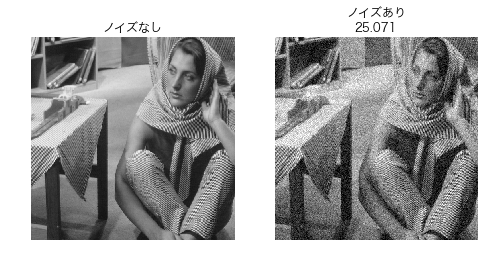

In [4]:
im = imread('barbara.png').astype(np.float)
# Y = im + np.random.randn(im.shape[0], im.shape[1]) * 20.
# Y.tofile('barbara_sig20')
Y = np.fromfile('barbara_sig20').reshape(im.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(im, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[1].imshow(Y, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('ノイズなし')
ax[1].set_title('ノイズあり\n{:.3f}'.format(get_psnr(im, Y)))

In [5]:
recon_nlm = denoise_nl_means(Y, h=20., multichannel=False)    
recon_nlm.tofile('recon_nlm')

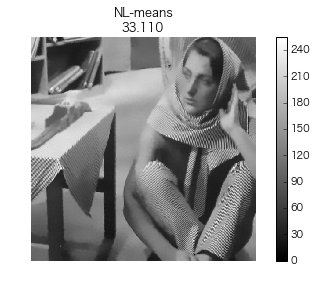

In [9]:
recon_nlm = np.fromfile('recon_nlm', dtype=np.float32).reshape(im.shape)

plt.imshow(recon_nlm, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
plt.axis('off')
plt.colorbar()
plt.title('NL-means\n{:.3f}'.format(get_psnr(im, recon_nlm)))
plt.tight_layout()
plt.savefig('recon_nlm.png', dpi=220)

In [10]:
recon_bm3d = np.array(bm3d(Y[:, :, np.newaxis].astype(np.float32), 20.)).reshape(Y.shape)
recon_bm3d.tofile('recon_bm3d')

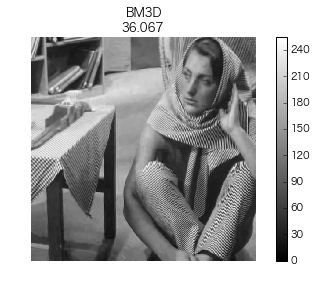

In [12]:
recon_bm3d = np.fromfile('recon_bm3d', dtype=np.float32).reshape(im.shape)

plt.imshow(recon_bm3d, cmap='gray', interpolation='Nearest', vmin=0, vmax=255)
plt.axis('off')
plt.colorbar()
plt.title('BM3D\n{:.3f}'.format(get_psnr(im, recon_bm3d)))
plt.tight_layout()
plt.savefig('recon_bm3d.png', dpi=220)